<a href="https://colab.research.google.com/github/wenhuipeng/fastai_practice/blob/main/05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.2 MB/s 
     |████████████████████████████████| 1.2 MB 45.8 MB/s 
     |████████████████████████████████| 189 kB 72.0 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 56 kB 6.1 MB/s 
     |████████████████████████████████| 51 kB 380 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *


# Image Classification


现在你了解了什么是深度学习，它有什么用，以及如何创建和部署一个模型，现在是时候让我们更深入地了解了！在一个理想的世界里，深度学习的从业者不需要知道引擎盖下的每一个细节。在一个理想的世界里，深度学习从业者不需要知道引擎盖下的每一个工作细节......但是，我们还没有生活在一个理想的世界。事实是，要使你的模型真正工作，并可靠地工作，有很多细节你必须得到正确的，还有很多细节你必须检查。这个过程需要在你的神经网络进行训练和预测时，能够观察它的内部情况，找到可能的问题，并知道如何解决它们。

因此，从这本书开始，我们将对深度学习的机制进行深入探讨。一个计算机视觉模型、一个NLP模型、一个表格模型等的架构是什么？你如何创建一个符合你特定领域需求的架构？你如何从训练过程中获得尽可能好的结果？你如何使事情变得更快？随着你的数据集的变化，你必须改变什么？

我们将从重复我们在第一章所看的相同的基本应用开始，但我们要做两件事。

让它们变得更好。

将它们应用于更多类型的数据。

为了做这两件事，我们将不得不学习深度学习拼图的所有碎片。这包括不同类型的层，正则化方法，优化器，如何将各层组合成架构，标签技术，以及更多。不过，我们并不是要把这些东西都扔给你；我们会根据需要逐步介绍这些东西，以解决与我们正在进行的项目有关的实际问题。

# From Dogs and Cats to Pet Breeds

在我们的第一个模型中，我们学会了如何对狗和猫进行分类。就在几年前，这被认为是一项非常具有挑战性的任务--但在今天，这太容易了 我们将无法向你展示用这个问题训练模型的细微差别，因为我们不用担心任何细节就能得到一个几乎完美的结果。但事实证明，同样的数据集也允许我们研究一个更具挑战性的问题：弄清楚每张图片中显示的是什么品种的宠物。

在<>中，我们将这些应用作为已经解决的问题来介绍。但这并不是现实生活中的工作方式。我们从一些我们一无所知的数据集开始。然后我们必须弄清楚它是如何被组合起来的，如何从中提取我们需要的数据，以及这些数据是什么样子。在本书的其余部分，我们将向你展示如何在实践中解决这些问题，包括所有必要的中间步骤，以了解你正在处理的数据，并在你进行建模时测试你的建模。

我们已经下载了Pet数据集，我们可以使用与<>中相同的代码得到这个数据集的路径。

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

现在，如果我们要了解如何从每张图片中提取每个宠物的品种，我们就需要了解这些数据是如何布局的。这种数据布局的细节是深度学习难题的重要部分。数据通常以这两种方式中的一种提供。

代表数据项的单个文件，如文本文件或图像，可能被组织到文件夹中或用文件名代表这些项目的信息

数据表，如CSV格式，其中每一行都是一个项目，可能包括文件名，提供表中的数据与其他格式的数据之间的联系，如文本文档和图像。

这些规则也有例外--特别是在基因组学等领域，可能有二进制数据库格式，甚至是网络流，但总的来说，你要处理的绝大多数数据集将使用这两种格式的某种组合。

要看我们的数据集里有什么，我们可以使用ls方法。

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('images'),Path('annotations')]

我们可以看到，这个数据集为我们提供了图像(Image)和注释目录(Annotations)。该数据集的网站告诉我们，注释目录包含了关于宠物在哪里的信息，而不是它们是什么。在本章中，我们要做的是分类，而不是本地化，也就是说，我们关心的是宠物是什么，而不是它们在哪里。因此，我们将暂时忽略注释目录。那么，让我们看看图像目录里面。

In [6]:
(path/"images").ls()

(#7393) [Path('images/Egyptian_Mau_29.jpg'),Path('images/chihuahua_149.jpg'),Path('images/Siamese_83.jpg'),Path('images/boxer_87.jpg'),Path('images/great_pyrenees_53.jpg'),Path('images/german_shorthaired_200.jpg'),Path('images/great_pyrenees_26.jpg'),Path('images/saint_bernard_198.jpg'),Path('images/Bengal_144.jpg'),Path('images/american_pit_bull_terrier_58.jpg')...]

Fastai 中大多数返回集合的函数和方法都使用了一个叫做 L 的类。L 可以被认为是普通 Python 列表类型的增强版，为常用操作增加了便利性。例如，当我们在笔记本中显示这个类的一个对象时，它以那里显示的格式出现。首先显示的是集合中的项目数，前缀为 #。在前面的输出中你还会看到，列表的后缀是一个省略号。这意味着只有前几个项目被显示出来--这是一件好事，因为我们不希望屏幕上出现超过7000个文件名

通过检查这些文件名，我们可以看到它们看起来是如何结构化的。每个文件名包含宠物品种，然后是下划线（_），一个数字，最后是文件扩展名。我们需要创建一段代码，从单一的Path中提取品种。Jupyter笔记本让这一切变得简单，因为我们可以逐渐建立起一些有效的东西，然后将其用于整个数据集。在这一点上，我们确实要小心，不要做太多的假设。例如，如果你仔细观察，你可能会注意到一些宠物品种包含多个单词，所以我们不能简单地在我们发现的第一个_字符处断句。为了让我们能够测试我们的代码，让我们挑出其中一个文件名。

In [7]:
fname = (path/"images").ls()[0]

从这样的字符串中提取信息的最强大、最灵活的方法是使用正则表达式，也被称为regex。正则表达式是一个特殊的字符串，用正则表达式语言编写，它指定了一个决定另一个字符串是否通过测试（即 "匹配 "正则表达式）的一般规则，也可能用于从该另一个字符串中提取一个或多个特定部分。

在这种情况下，我们需要一个能从文件名中提取宠物品种的正则表达式。

我们没有足够的空间在这里给你一个完整的正则表达式教程，但是网上有许多优秀的教程，我们知道你们中的许多人已经熟悉了这个奇妙的工具。如果你不熟悉，那也没关系--这是你纠正这种情况的一个好机会 我们发现，正则表达式是我们编程工具包中最有用的工具之一，许多学生告诉我们，这是他们最想学习的东西之一。因此，现在就去谷歌搜索 "正则表达式教程"，然后在你好好看看之后再回到这里。该书的网站还提供了一份我们最喜欢的清单。

a: 正则表达式不仅非常方便，而且还有有趣的渊源。它们之所以是 "正则"，是因为它们最初是 "正则 "语言的例子，是乔姆斯基层次结构中的最低等级，是语言学家诺姆-乔姆斯基开发的语法分类，他还写了《句法结构》，这是寻找人类语言背后的形式语法的先驱性著作。这就是计算机的魅力之一：可能你每天伸手拿的锤子实际上来自宇宙飞船。

a: Not only are regular expressions dead handy, but they also have interesting roots. They are "regular" because they were originally examples of a "regular" language, the lowest rung within the Chomsky hierarchy, a grammar classification developed by linguist Noam Chomsky, who also wrote Syntactic Structures, the pioneering work searching for the formal grammar underlying human language. This is one of the charms of computing: it may be that the hammer you reach for every day in fact came from a spaceship.

当你写一个正则表达式时，最好的方法是先针对一个例子进行尝试。让我们使用 findall 方法，针对 fname 对象的文件名尝试一下正则表达式。

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Egyptian_Mau']

这个正则表达式将最后一个下划线字符之前的所有字符都拔掉，只要后续字符是数字，然后是JPEG文件扩展名。

现在我们确认正则表达式对这个例子有效，让我们用它来标记整个数据集。对于用正则表达式进行标注，我们可以使用RegexLabeller类。在这个例子中，我们使用了我们在<>中看到的数据块API（事实上，我们几乎总是使用数据块API--它比我们在<>中看到的简单工厂方法要灵活得多）。

In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


这个DataBlock调用的一个重要部分，我们以前没有见过，是在这两行。

item_tfms=Resize(460)。

batch_tfms=aug_transforms(size=224, min_scale=0.75)

这两行实现了一个fastai数据增强的策略，我们称之为预设大小(Presizing)。预设大小(Presizing)是一种特殊的图像扩增方式，其目的是在保持良好性能的同时尽量减少数据破坏。

# Presizing

我们需要我们的图像具有相同的尺寸，以便它们可以整理成张量，并传递给GPU。我们还希望尽量减少我们执行的不同的增强计算的数量。性能要求表明，在可能的情况下，我们应该将我们的增强变换组成更少的变换（以减少计算的数量和有损操作的数量），并将图像转换成统一的尺寸（以便在GPU上更有效地处理）。

挑战在于，如果在调整大小到增强的尺寸后再执行，各种常见的数据增强变换可能会引入虚假的空区，降低数据，或两者兼而有之。例如，将一张图片旋转45度，在新的边界的角落区域填充空洞，这不会让模型学到任何东西。许多旋转和缩放操作都需要插值来创建像素。这些内插的像素来自原始图像数据，但质量仍然较低。

为了应对这些挑战，预设大小采取了两种策略，在<>中显示。

将图像调整到相对 "大 "的尺寸--即明显大于目标训练尺寸的尺寸。

将所有常见的增强操作（包括调整到最终的目标尺寸）组合成一个，并在处理结束时只在GPU上执行一次组合操作，而不是单独执行这些操作并多次插值。

第一步，调整大小，创建足够大的图像，使它们有足够的余地，允许在其内部区域进行进一步的增强变换，而不产生空区。这种转换是通过调整大小到一个正方形，使用一个大的裁剪尺寸。在训练集上，裁剪区域是随机选择的，裁剪的大小被选择为覆盖图像的整个宽度或高度，以较小者为准。

在第二步中，GPU被用于所有的数据扩增，所有潜在的破坏性操作都一起完成，最后进行一次插值。

这张图片显示了两个步骤。

裁剪全宽或全高。这是在item_tfms中，所以在复制到GPU之前，它被应用于每个单独的图像。它用于确保所有图像都是相同的尺寸。在训练集上，裁剪区域是随机选择的。在验证集上，总是选择图像的中心方形。

随机裁剪和增强。这是在batch_tfms中，所以它是在GPU上一次性应用于一个批次，这意味着它是快速的。在验证集上，只有模型所需的最终大小的调整是在这里完成的。在训练集上，随机裁剪和任何其他增强都是首先完成的。

为了在fastai中实现这个过程，你用Resize作为一个大尺寸的项目转换，用RandomResizedCrop作为一个小尺寸的批量转换。如果你在aug_transforms函数中包含min_scale参数，RandomResizedCrop就会为你添加，就像上一节中的DataBlock调用那样。另外，你也可以用pad或squish代替crop（默认）来进行初始的Resize。

<>显示了经过缩放、插值、旋转，然后再插值的图像（这是所有其他深度学习库使用的方法）和经过缩放和旋转作为一个操作，然后只在左边插值一次的图像（fastai方法）之间的区别，这里显示在左边。


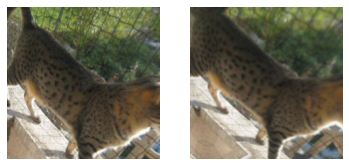

In [10]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
#dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1 = dblock1.dataloaders([(path/'images'/'Egyptian_Mau_29.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

你可以看到，右边的图像清晰度较低，并且在左下角有反射填充的假象；另外，左上角的草也完全消失了。我们发现，在实践中，使用预设大小的方法可以显著提高模型的准确性，而且往往也能带来速度的提高。

fastai库还提供了一些简单的方法来检查你的数据在训练模型之前是否正确，这是一个非常重要的步骤。我们接下来会看一下这些。

In [11]:
#path=/root/.fastai/data/oxford-iiit-pet/

# Checking and Debugging a DataBlock

我们永远不能只是假设我们的代码在完美地工作。编写DataBlock就像编写一个蓝图。如果你的代码中某个地方出现了语法错误，你会得到一个错误信息，但你不能保证你的模板会按照你的意图在你的数据源上工作。因此，在训练一个模型之前，你应该总是检查你的数据。你可以使用show_batch方法来做这个。

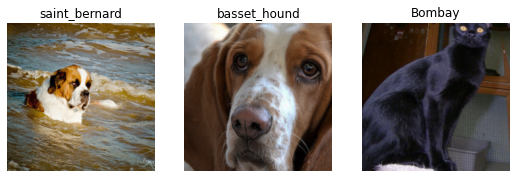

In [12]:
dls.show_batch(nrows=1, ncols=3)

看一看每张图片，并检查每张图片似乎都有该品种宠物的正确标签。通常情况下，数据科学家在处理数据时，并不像领域专家那样熟悉：例如，我实际上不知道这些宠物品种中有很多是什么。因为我不是宠物品种方面的专家，所以我此时会用谷歌图片来搜索其中的几个品种，并确保图片看起来与我在这个输出中看到的相似。

如果你在建立你的DataBlock时犯了一个错误，很可能在这一步之前你不会看到它。为了调试这个问题，我们鼓励你使用summary方法。它将尝试从你给它的源头创建一个批处理，并提供大量的细节。另外，如果它失败了，你会看到错误究竟发生在哪一点上，库会尝试给你一些帮助。例如，一个常见的错误是忘记了使用调整大小的转换，所以你最终得到了不同大小的图片，而无法对它们进行批处理。下面是在这种情况下的摘要（注意，从写的时候起，确切的文字可能已经改变了，但它会给你一个概念）。

In [13]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_176.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x225
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_176.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=300x225, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_it

RuntimeError: ignored

您可以确切地看到我们如何收集和分割数据，如何从文件名到示例(元组(图像，类别))，然后应用了什么项转换，以及它如何未能在批处理中整理这些示例(因为形状不同)。

一旦你认为你的数据看起来是正确的，我们通常建议下一步应该使用它来训练一个简单的模型。我们经常看到人们把训练真正的模特的时间拖得太久了。因此，他们实际上并不知道他们的基线结果是什么样子的。也许您的问题不需要许多奇特的特定于领域的工程。或者数据似乎根本不能训练模型。这些都是你想尽快知道的事情。对于这个初始测试，我们将使用与<>中使用的相同的简单模型:

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

正如我们之前简单讨论过的，当我们拟合一个模型时，所显示的表格显示了我们在每个历时训练后的结果。请记住，一个历时是对数据中所有图像的一次完整通过。显示的列是训练集项目的平均损失，验证集的损失，以及我们要求的任何指标--本例是错误率。

请记住，损失是我们决定用来优化我们模型参数的任何函数。但是我们实际上还没有告诉fastai我们要使用什么损失函数。那么，它在做什么呢？fastai一般会根据你所使用的数据和模型的种类，尝试选择一个合适的损失函数。在这种情况下，我们有图像数据和一个分类结果，所以fastai将默认使用交叉熵损失。


# Cross-Entropy Loss

交叉熵损失是一个损失函数，与我们在前一章中使用的函数相似，但（正如我们将看到的）有两个好处。

即使我们的因变量有两个以上的类别，它也能发挥作用。

它能使训练更快、更可靠。

为了理解交叉熵损失如何对有两个以上类别的因变量起作用，我们首先要理解损失函数所看到的实际数据和激活是什么样子的。

# Viewing Activations and Labels

让我们来看看我们模型的激活情况。为了真正从我们的DataLoaders获得一批真实的数据，我们可以使用one_batch方法。

In [15]:
x,y = dls.one_batch()

正如你所看到的，这将返回因变量和自变量，作为一个小型的批次。让我们看看我们的因变量中实际包含了什么。

In [16]:
y

TensorCategory([ 2, 28, 34, 18, 34,  0,  0, 36, 33, 13, 14,  5, 32, 17,  6,  4, 30,  7,  2, 16,  6, 18, 30, 29, 24, 35, 22, 21,  8,  3, 11,  8, 22, 30, 24, 30, 24, 23, 22, 27, 33,  2, 13, 26, 22,  9, 30, 20,
         9, 32, 23,  8, 10, 25, 26, 27, 36, 27, 10, 25, 11, 28, 19, 32])

我们的批量大小是64，所以我们在这个张量中有64行。每一行都是0到36之间的一个整数，代表我们37个可能的宠物品种。我们可以使用Learner.get_preds查看预测结果（也就是我们神经网络最后一层的激活）。这个函数要么接受一个数据集索引（0 for train，1 for valid），要么接受一个批次的迭代器。因此，我们可以将一个简单的列表与我们的批次一起传递给它，以获得我们的预测结果。它默认返回预测值和目标值，但是由于我们已经有了目标值，我们可以通过将其赋值给特殊变量_而有效地忽略它们。

实际的预测是37个介于0和1之间的概率，总共加起来是1。

In [17]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

epoch,train_loss,valid_loss,error_rate,time


TensorBase([5.0285e-03, 7.0945e-03, 6.0715e-03, 8.9096e-04, 5.0665e-03, 8.9022e-03, 1.7114e-02, 2.1076e-03, 1.1292e-02, 2.4590e-01, 1.7032e-02, 3.2256e-01, 1.1135e-02, 1.0041e-02, 1.3245e-03, 4.4411e-02,
        8.5642e-02, 3.5547e-02, 3.4433e-02, 1.2703e-02, 8.4152e-04, 1.1178e-02, 3.0143e-04, 2.4305e-02, 9.6534e-04, 1.0870e-03, 1.7370e-03, 2.7283e-03, 5.8947e-03, 7.7067e-03, 4.1522e-03, 9.7689e-03,
        1.2875e-03, 2.1344e-02, 4.0657e-03, 1.8967e-03, 1.6445e-02])

为了将我们模型的激活转化为这样的预测，我们使用了一种叫做softmax的激活函数。

# Softmax

在我们的分类模型中，我们在最后一层使用softmax激活函数，以确保激活值都在0和1之间，并且它们的总和为1。

Softmax类似于我们之前看到的sigmoid函数。作为提醒，sigmoid看起来像这样。

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


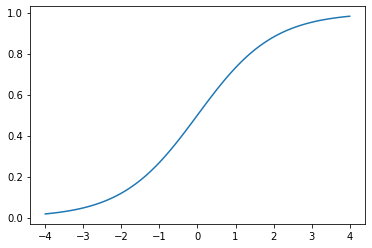

In [18]:
plot_function(torch.sigmoid, min=-4,max=4)

我们可以将这个函数应用于神经网络的单列激活，并得到一列介于0和1之间的数字，所以它是我们最后一层非常有用的激活函数。

现在想一想，如果我们想在目标中拥有更多的类别（比如我们的37个宠物品种）会怎样？这意味着我们需要更多的激活，而不仅仅是一列：我们需要每个类别的激活。例如，我们可以创建一个预测3和7的神经网络，返回两个激活，每个类别一个--这将是创建更普遍方法的第一步。让我们在这个例子中使用一些标准差为2的随机数（所以我们把randn乘以2），假设我们有6张图片和2个可能的类别（其中第一列代表3s，第二列是7s）。

In [19]:
#hide
torch.random.manual_seed(42);

In [20]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

我们不能直接取其中的sigmoid，因为我们不能得到加起来为1的行（即，我们希望成为3的概率加上成为7的概率加起来为1）。

In [21]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

在<>中，我们的神经网络为每个图像创建了一个单一的激活，我们通过sigmoid函数将其传递。二进制问题是分类问题的一个特例，因为目标可以被视为一个单一的布尔值，正如我们在mnist_loss中所做的那样。但是二进制问题也可以在更普遍的分类器群体的背景下进行思考，这些分类器有任意数量的类别：在这个案例中，我们碰巧有两个类别。正如我们在熊分类器中看到的，我们的神经网络将为每个类别返回一个激活。

那么，在二进制的情况下，这些激活到底表示什么？一对激活只是表示输入为3和为7的相对置信度。总体数值，无论它们是高还是低，都不重要--重要的是哪个更高，以及高多少。

我们希望，既然这只是表示同一问题的另一种方式，我们将能够在我们的神经网络的双激活版本上直接使用sigmoid。事实上，我们可以这样做。我们可以只取神经网络激活之间的差值，因为这反映了我们对输入是3比7有多大的把握，然后取它的sigmoid值。

In [22]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

第二列（7的概率）将是该值减去1的结果。事实证明，这个名为softmax的函数正是如此。

def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

行话。指数函数（exp）。字面定义为e**x，其中e是一个大约等于2.718的特殊数字。它是自然对数函数的逆函数。请注意，exp总是正的，而且增加得非常快。

让我们检查一下，softmax对第一列的返回值与sigmoid相同，对第二列的返回值减去了1。

In [23]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts


tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

softmax相当于sigmoid的多类别函数--当我们有两个以上的类别，并且类别的概率必须加到1时，我们必须使用它，甚至当只有两个类别时我们也经常使用它，只是为了使事情更加一致。我们可以创建其他函数，这些函数的属性是所有激活都在0和1之间，并且总和为1；然而，没有其他函数与sigmoid函数有相同的关系，我们已经看到sigmoid函数是平滑和对称的。另外，我们很快就会看到，softmax函数与我们将在下一节研究的损失函数配合得很好。

如果我们有三个输出激活，比如在我们的熊分类器中，计算单个熊图像的softmax就会像<>一样。

这个函数在实践中有什么作用？指数确保我们所有的数字都是正数，然后除以总和，确保我们会有一堆数字加起来是1。指数还有一个很好的特性：如果我们的激活x中的一个数字比其他数字稍大，指数会放大这个数字（因为它是按指数增长的），这意味着在softmax中，这个数字会更接近1。

直观地说，softmax函数真的想在其他类别中挑选一个类别，所以当我们知道每张图片都有一个明确的标签时，它是训练分类器的理想选择。(请注意，在推理过程中，它可能不那么理想，因为你可能希望你的模型有时会告诉你，它不能识别它在训练过程中看到的任何类别，而不是因为它有一个稍大的激活分数而选择一个类别。在这种情况下，使用多个二进制输出列来训练一个模型可能更好，每一个都使用sigmoid激活。）

Softmax是交叉熵损失的第一部分，第二部分是对数似然。

# Log Likelihood

当我们在上一章为我们的MNIST例子计算损失时，我们使用了。

def mnist_loss(inputs, targets):

    inputs = inputs.sigmoid()

    return torch.where(target==1, 1-inputs, inputs).mean()
    
就像我们从sigmoid到softmax一样，我们需要扩展损失函数，使其不仅仅适用于二元分类--它需要能够对任何数量的类别进行分类（在本例中，我们有37个类别）。在softmax之后，我们的激活值介于0和1之间，预测批中每一行的激活值之和为1。我们的目标是0到36之间的整数。

在二进制情况下，我们用torch.where来选择输入和1-输入。当我们把二元分类当作有两个类别的一般分类问题时，它实际上变得更加容易，因为（正如我们在上一节中看到的）我们现在有两列，包含相当于输入和1-输入的内容。因此，我们所要做的就是在适当的列中进行选择。让我们试着在PyTorch中实现这一点。对于我们的合成3s和7s的例子，让我们说这些是我们的标签。

In [24]:
targ = tensor([0,1,0,1,1,0])

and these are the softmax activations:

In [25]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

然后对于targ的每一项，我们可以使用张量索引来选择sm_acts的适当列，像这样。


In [26]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

为了确切地了解这里发生了什么，让我们把所有的列都放在一个表格里。这里，前两列是我们的激活，然后是目标，行索引，最后是上面显示的结果。Here, the first two columns are our activations, then we have the targets, the row index, and finally the result shown immediately above:

In [27]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = -sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,loss
0.602469,0.397531,0,0,-0.602469
0.502065,0.497935,1,1,-0.497935
0.133188,0.866811,0,2,-0.133188
0.996640,0.003360,1,3,-0.003360
0.595949,0.404051,1,4,-0.404051
0.366118,0.633882,0,5,-0.366118


看这个表，你可以看到最后一列可以通过把targ和idx列作为索引进入包含3和7列的两列矩阵来计算。这就是sm_acts[idx, targ]的实际操作。

真正有趣的是，这实际上在两列以上的情况下也能正常工作。要看到这一点，考虑一下如果我们为每个数字（0到9）增加一个激活列，然后targ包含一个从0到9的数字会发生什么。只要激活列的总和为1（如果我们使用softmax，它们就会为1），那么我们就会有一个损失函数来显示我们对每个数字的预测程度。

我们只从包含正确标签的那一列中选取损失。我们不需要考虑其他列，因为根据softmax的定义，它们加起来就是1减去正确标签对应的激活值。因此，让正确标签的激活度尽可能高，肯定意味着我们也在减少其余列的激活度。

PyTorch提供了一个与sm_acts[range(n), targ]完全相同的函数（只不过它取的是负数，因为之后应用对数时，我们会有负数），称为nll_loss（NLL代表负对数似然）。

In [28]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [29]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

尽管它的名字叫PyTorch，但这个函数并不取对数。我们将在下一节中看到原因，但首先，让我们看看为什么取对数会很有用。

# Taking the Log

我们在上一节看到的函数作为损失函数效果很好，但我们可以让它变得更好一些。问题是，我们使用的是概率，而概率不能小于0或大于1。这意味着我们的模型将不在乎它预测的是0.99还是0.999。的确，这些数字是如此接近--但从另一个意义上说，0.999比0.99更有信心10倍。因此，我们想把0和1之间的数字转换为负无穷和0之间的数字。有一个数学函数正是这样做的：对数（可作为Torch.log）。它没有为小于0的数字定义，看起来像这样。

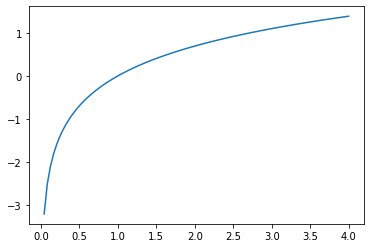

In [30]:
plot_function(torch.log, min=0,max=4)

"对数 "有印象吗？对数函数有这样的特性。

y = b**a

a = log(y,b)

在这种情况下，我们假设log(y,b)返回对数y的基数b。然而，PyTorch实际上并没有这样定义log：Python中的log使用特殊数字e（2.718...）作为基数。

也许对数是你在过去20年左右的时间里没有想过的东西。但这是一个对深度学习中的许多事情都非常关键的数学概念，所以现在是刷新你记忆的好时机。关于对数，需要了解的关键是这个关系。

log(a*b) = log(a)+log(b)

当我们以这种形式看到它时，它看起来有点无聊；但想想这真正意味着什么。它意味着，当基础信号以指数或倍数增长时，对数会线性增长。例如，这被用于地震严重程度的里氏等级，以及噪音水平的分贝等级。它也经常被用于金融图表中，在那里我们想更清楚地显示复合增长率。计算机科学家喜欢使用对数，因为它意味着可以产生非常非常大和非常非常小的数字的乘法，可以被加法所取代，而加法更不可能导致我们的计算机难以处理的规模。

s: 不仅仅是计算机科学家喜欢日志! 在计算机出现之前，工程师和科学家使用一种叫做 "滑尺 "的特殊尺子，通过加对数来做乘法。对数在物理学中被广泛使用，用于乘以非常大或非常小的数字，以及许多其他领域。

取我们概率的正对数或负对数的平均值（取决于是正确类还是错误类），就可以得到负对数似然损失。在PyTorch中，nll_loss假定你已经取了softmax的对数，所以它实际上并没有为你做对数计算。

警告。混乱的名称，请注意。nll_loss中的nll代表 "负对数似然"，但它实际上根本不取对数！它假定你已经取了对数。它假定你已经取得了对数。PyTorch有一个名为log_softmax的函数，它以一种快速而准确的方式结合了对数和softmax。

当我们先取softmax，然后取其对数似然，这种组合被称为交叉熵损失。在PyTorch中，这可以作为nn.CrossEntropyLoss来使用（在实践中，它实际上是先做log_softmax，然后再做nll_loss）。

In [31]:
loss_func = nn.CrossEntropyLoss()

如你所见，这是一个类。实例化它可以给你一个对象，它的行为就像一个函数。

In [32]:
loss_func(acts, targ)

tensor(1.8045)

所有的PyTorch损失函数都以两种形式提供，一种是上面所示的类，另一种是普通的函数形式，可在F命名空间中使用。

In [33]:
F.cross_entropy(acts, targ)

tensor(1.8045)

两种方法都很好用，可以在任何情况下使用。我们注意到，大多数人倾向于使用类的版本，而且在PyTorch的官方文档和示例中更经常使用，所以我们也会倾向于使用这个版本。

默认情况下，PyTorch的损失函数取的是所有项目的损失的平均值。你可以使用reduction='none'来禁用它。

In [34]:

nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

s: 当我们考虑其梯度时，交叉熵损失的一个有趣的特征就出现了。cross_entropy(a,b)的梯度只是softmax(a)-b。由于softmax(a)只是模型的最终激活值，这意味着梯度与预测值和目标值之间的差异成正比。这与回归中的平均平方误差相同（假设没有最终激活函数，如y_range添加的函数），因为(a-b)**2的梯度是2*(a-b)。因为梯度是线性的，这意味着我们不会看到梯度的突然跳跃或指数增长，这应该导致模型的训练更加平滑。

现在我们已经看到了隐藏在我们损失函数背后的所有部分。但是，虽然这给我们的模型做得多好（或多坏）提供了一个数字，但它并不能帮助我们知道它是否真的有什么好处。现在让我们看看解释我们模型预测的一些方法。

# 模型解释

直接解释损失函数是非常困难的，因为它们被设计成计算机可以区分和优化的东西，而不是人们可以理解的东西。这就是为什么我们有衡量标准。这些并不用于优化过程，而只是帮助我们这些可怜的人类了解发生了什么。在这种情况下，我们的准确率看起来已经很不错了! 那么，我们在哪里犯错呢？

我们在<>中看到，我们可以使用混淆矩阵来查看我们的模型在哪里做得好，在哪里做得不好。

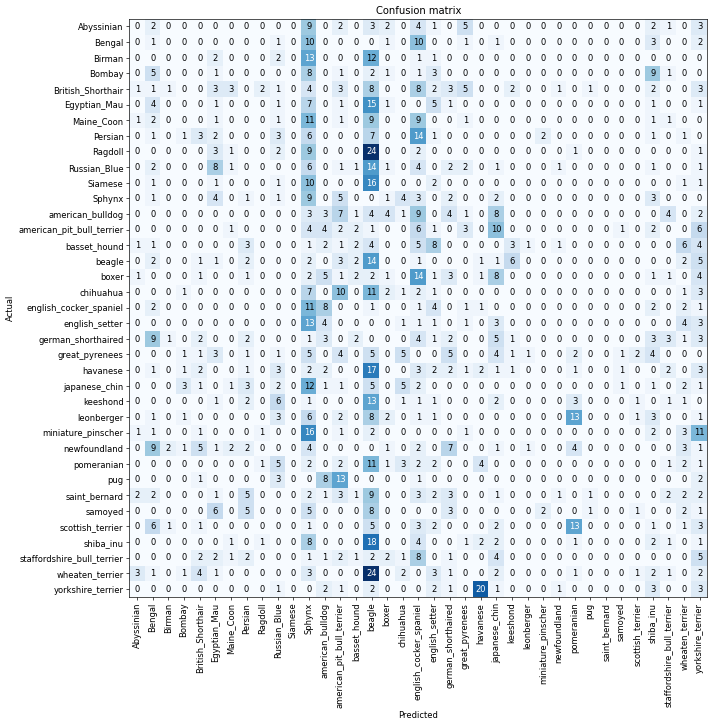

In [35]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

哦，亲爱的--在这种情况下，一个混乱的矩阵是非常难读的。我们有37个不同品种的宠物，这意味着我们在这个巨大的矩阵中有37×37个条目! 相反，我们可以使用most_confused方法，它只显示混淆矩阵中预测错误最多的单元格（这里，至少有5个或更多）。

In [36]:
interp.most_confused(min_val=5)

[('Ragdoll', 'beagle', 24),
 ('wheaten_terrier', 'beagle', 24),
 ('yorkshire_terrier', 'havanese', 20),
 ('shiba_inu', 'beagle', 18),
 ('havanese', 'beagle', 17),
 ('Siamese', 'beagle', 16),
 ('miniature_pinscher', 'Sphynx', 16),
 ('Egyptian_Mau', 'beagle', 15),
 ('Persian', 'english_cocker_spaniel', 14),
 ('Russian_Blue', 'beagle', 14),
 ('boxer', 'english_cocker_spaniel', 14),
 ('Birman', 'Sphynx', 13),
 ('english_setter', 'Sphynx', 13),
 ('keeshond', 'beagle', 13),
 ('leonberger', 'pomeranian', 13),
 ('pug', 'american_pit_bull_terrier', 13),
 ('scottish_terrier', 'pomeranian', 13),
 ('Birman', 'beagle', 12),
 ('japanese_chin', 'Sphynx', 12),
 ('Maine_Coon', 'Sphynx', 11),
 ('chihuahua', 'beagle', 11),
 ('english_cocker_spaniel', 'Sphynx', 11),
 ('miniature_pinscher', 'yorkshire_terrier', 11),
 ('pomeranian', 'beagle', 11),
 ('Bengal', 'Sphynx', 10),
 ('Bengal', 'english_cocker_spaniel', 10),
 ('Siamese', 'Sphynx', 10),
 ('american_pit_bull_terrier', 'japanese_chin', 10),
 ('chihuahu

由于我们不是宠物品种专家，我们很难知道这些类别错误是否反映了识别品种的实际困难。因此，我们再次求助于谷歌。一点点的谷歌搜索告诉我们，这里显示的最常见的类别错误实际上是品种的差异，即使是专业的饲养员有时也会有不同意见。因此，这给了我们一些安慰，我们在正确的轨道上。

我们似乎有一个良好的基线。我们现在可以做什么来使它变得更好？

# Improving Our Model

现在我们将研究一系列的技术来改善我们的模型的训练，使其变得更好。在这样做的同时，我们将解释一下转移学习以及如何在不破坏预训练权重的情况下尽可能地微调我们的预训练模型。

训练模型时，我们需要设置的第一件事是学习率。我们在上一章中看到，为了尽可能有效地训练，它需要恰到好处，那么我们如何选择一个好的学习率呢？ fastai提供了一个工具。

# The Learning Rate Finder

在训练一个模型时，我们可以做的最重要的事情之一是确保我们有正确的学习率。如果我们的学习率太低，它可能需要很多很多的 epochs 来训练我们的模型。这不仅浪费时间，而且还意味着我们可能会有过度拟合的问题，因为每当我们对数据进行一次完整的传递时，我们就会给我们的模型一个记忆的机会。

所以，让我们把我们的学习率变得非常高，对吗？当然，让我们试试，看看会发生什么。

In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.801775,4.289036,0.501353,34:46


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

这看起来并不妙。事情是这样的。优化器向正确的方向迈进，但它迈得太远了，以至于它完全超出了最小损失。重复多次会使它越走越远，而不是越走越近!

我们该怎么做才能找到完美的学习率--不要太高，也不要太低？2015年，研究人员莱斯利-史密斯想出了一个绝妙的主意，叫做学习率搜索器。他的想法是，从一个非常非常小的学习率开始，这个学习率小到我们永远不会想到它会大到无法处理。我们用它来做一个小批次，发现之后的损失是什么，然后按一定比例增加学习率（例如，每次增加一倍）。然后我们再做一个小批量，跟踪损失，并再次将学习率提高一倍。我们一直这样做，直到损失变得更糟，而不是更好。这就是我们知道我们已经走得太远的地方。然后我们选择一个比这个点低一点的学习率。我们的建议是选择其中之一。

比达到最小损失的地方低一个数量级（即最小值除以10）。
损失明显减少的最后一个点
学习率查找器会计算出曲线上的这些点来帮助你。这两个规则通常会给出大约相同的数值。在第一章中，我们没有指定学习率，使用fastai库的默认值（即1e-3）。

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

我们可以看到，在1e-6到1e-3的范围内，没有什么真正发生，模型没有训练。然后损失开始减少，直到达到最小值，然后再次增加。我们不希望学习率大于1e-1，因为这会使训练出现像之前那样的发散（你可以自己试试），但是1e-1已经太高了：在这个阶段，我们已经离开了损失稳定下降的阶段。

在这个学习率图中，似乎3e-3左右的学习率是合适的，所以让我们选择这个。

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

注：对数刻度。学习率查找图有一个对数刻度，这就是为什么1e-3和1e-2之间的中间点是3e-3和4e-3之间。这是因为我们主要关心的是学习率的数量级。

有趣的是，学习率查找器在2015年才被发现，而神经网络从20世纪50年代就开始发展了。在这段时间里，找到一个好的学习率也许一直是从业者最重要和最具挑战性的问题。该解决方案不需要任何高级数学、巨大的计算资源、巨大的数据集，或其他任何会使任何好奇的研究人员无法接触到的东西。此外，莱斯利-史密斯，并不是某个专属的硅谷实验室的一部分，而是作为一名海军研究员在工作。所有这些都是在说：深度学习的突破性工作绝对不需要获得大量资源、精英团队或先进的数学思想。还有很多工作要做，只需要一点常识、创造力和坚韧。

现在我们有了一个好的学习率来训练我们的模型，让我们来看看我们如何微调预训练模型的权重。

我们在<>中简要地讨论了转移学习的工作原理。我们看到，其基本思想是，一个预先训练好的模型，可能在数以百万计的数据点（如ImageNet）上进行训练，为其他任务进行微调。但这到底是什么意思呢？

我们现在知道，卷积神经网络由许多线性层组成，每一对之间有一个非线性激活函数，然后是一个或多个最后的线性层，在最后有一个激活函数，如softmax。最后的线性层使用一个有足够多列的矩阵，使输出大小与我们模型中的类的数量相同（假设我们正在进行分类）。

当我们在转移学习中进行微调时，最后的线性层不太可能对我们有任何用处，因为它是专门用来对原始预训练数据集中的类别进行分类。因此，当我们进行迁移学习时，我们将它移除，扔掉，然后用一个新的线性层取代它，并为我们所需的任务提供正确的输出数量（在这种情况下，会有37个激活）。

这个新增加的线性层将有完全随机的权重。因此，我们的模型在微调之前有完全随机的输出。但这并不意味着它是一个完全随机的模型! 在最后一个层之前的所有层都经过了仔细的训练，在一般的图像分类任务中表现良好。正如我们在<>中Zeiler和Fergus论文的图像中看到的那样（见<>至<>），前几层编码了非常一般的概念，如寻找梯度和边缘，而后几层编码了对我们仍然非常有用的概念，如寻找眼球和毛皮。

我们希望以这样的方式来训练一个模型，让它记住所有这些来自预训练模型的一般有用的概念，用它们来解决我们的特定任务（对宠物品种进行分类），并且只根据我们特定任务的具体要求来调整它们。

在微调时，我们面临的挑战是用能正确实现我们所需任务（宠物品种分类）的权重来取代我们增加的线性层中的随机权重，而不破坏精心预训的权重和其他层。实际上，有一个非常简单的技巧可以让这种情况发生：告诉优化器只更新那些随机添加的最终层中的权重。完全不要改变神经网络其他部分的权重。这就是所谓的冻结那些预训练的层。

当我们从一个预训练的网络中创建一个模型时，fastai会自动为我们冻结所有的预训练层。当我们调用 fine_tune 方法时，fastai 做了两件事。

训练随机添加的层为一个 epoch，所有其他层被冻结。

解冻所有的层，并在所要求的历时数内训练它们。

尽管这是一个合理的默认方法，但对于你的特定数据集来说，你可能会通过稍微不同的方式获得更好的结果。fine_tune方法有一些参数，你可以用来改变它的行为，但是如果你想得到一些自定义的行为，直接调用底层方法可能是最简单的。请记住，你可以通过使用以下语法来查看该方法的源代码。

In [1]:
learn.fine_tune??

Object `learn.fine_tune` not found.


因此，让我们尝试自己手动做这个。首先，我们将使用fit_one_cycle来训练随机添加的层，训练三个epochs。正如在<>中提到的，fit_one_cycle是不使用fine_tune来训练模型的建议方式。我们将在本书后面看到原因；简而言之，fit_one_cycle所做的是以低的学习率开始训练，在训练的第一部分逐渐增加，然后在训练的最后部分再逐渐减少。

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

然后我们将解冻模型:

In [ ]:
learn.unfreeze()

并再次运行lr_find，因为有更多的层需要训练，而权重已经被训练了三个 epochs，这意味着我们之前发现的学习率已经不合适了。

In [ ]:
learn.lr_find()

请注意，该图与我们有随机权重时有些不同：我们没有那种表明模型正在训练的急剧下降的情况。这是因为我们的模型已经被训练过了。在这里，我们在急剧上升之前有一个平坦的区域，我们应该在急剧上升之前取一个点，例如1e-5。具有最大梯度的点不是我们在这里寻找的，应该被忽略。

让我们以一个合适的学习率进行训练。

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

这使我们的模型有了一些改进，但我们还可以做得更多。我们的预训练模型的最深层可能不需要像最后几层那样高的学习率，所以我们可能应该对这些层使用不同的学习率--这被称为使用鉴别性的学习率。（this is known as using discriminative learning rates.）

# Discriminative Learning Rates

即使在我们解冻之后，我们仍然非常关心那些预训练的权重的质量。我们不会期望那些预训练的参数的最佳学习率会像随机添加的参数一样高，即使在我们调整了那些随机添加的参数几个epochs之后。请记住，预训练的权重已经被训练了数百个epochs，在数百万张图像上。

此外，你还记得我们在<>中看到的图像吗，显示了每一层学习的内容？第一层学习非常简单的基础，如边缘和梯度检测器；这些可能对几乎任何任务都是有用的。后面的层学习更复杂的概念，如 "眼睛 "和 "日落"，这可能对你的任务完全没有用处（例如，也许你正在对汽车模型进行分类）。因此，让后期层比早期层更快地进行微调是有意义的。

因此，fastai的默认方法是使用判别性学习率。这最初是在我们将在<>中介绍的NLP迁移学习的ULMFiT方法中开发的。像深度学习中的许多好主意一样，它非常简单：对神经网络的早期层使用较低的学习率，对后期层（尤其是随机添加的层）使用较高的学习率。这个想法是基于Jason Yosinski提出的见解，他在2014年表明，通过转移学习，神经网络的不同层应该以不同的速度进行训练，如<>中所示。

fastai可以让你在任何预期有学习率的地方传递一个Python slice对象。传递的第一个值将是神经网络最早一层的学习率，第二个值将是最后一层的学习率。中间各层的学习率将在这个范围内成倍地等距。让我们用这种方法来复制之前的训练，但这次我们只将我们网络的最低层设置为1e-6的学习率；其他层将扩大到1e-4。让我们训练一段时间，看看会发生什么。


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

现在，微调工作做得很好!

fastai可以向我们展示训练和验证损失的图表。

In [ ]:
learn.recorder.plot_loss()

正如你所看到的，训练损失不断地变得越来越好。但是请注意，最终验证损失的改善会放缓，有时甚至会变得更糟！这就是模型开始过度拟合的时候。这是该模型开始过度拟合的时候了。特别是，该模型对其预测变得过于自信。但这并不意味着它的准确度越来越低，这是必然的。看看每个历时的训练结果表，你经常会看到，即使验证损失越来越差，准确率也会继续提高。最后，重要的是你的准确度，或者更普遍的是你选择的指标，而不是损失。损失只是我们给计算机的函数，帮助我们进行优化。

在训练模型时，你必须做出的另一个决定是要训练多长时间。我们接下来会考虑这个问题。

# Selecting the Number of Epochs

通常你会发现，在选择训练多少个历时时，你会受到时间的限制，而不是概括性和准确性的限制。因此，你的第一种训练方法应该是简单地选择一个能在你乐意等待的时间内训练的历时数。然后看看训练和验证损失图，如上图所示，特别是你的指标，如果你看到它们即使在最后的epochs中仍然在变好，那么你知道你没有训练太长时间。

另一方面，你很可能看到你选择的指标在训练结束时确实越来越差。记住，我们要寻找的不仅仅是验证损失变坏，而是实际的指标。你的验证损失在训练期间首先会变坏，因为模型变得过于自信，后来才会变坏，因为它错误地记忆了数据。我们在实践中只关心后者的问题。记住，我们的损失函数只是我们用来让我们的优化器拥有可以区分和优化的东西；它实际上不是我们在实践中关心的东西。

在1周期训练之前，很常见的做法是在每个历时结束时保存模型，然后在每个历时中保存的所有模型中选择准确度最高的模型。这就是所谓的提前停止。然而，这不太可能给你最好的答案，因为中间的那些历时发生在学习率有机会达到小值之前，在那里它可以真正找到最佳结果。因此，如果你发现你已经过度拟合了，你实际上应该做的是从头开始重新训练你的模型，这一次根据你以前发现的最佳结果选择一个总的历时数。

如果你有时间训练更多的epochs，你可能想用这些时间来训练更多的参数，也就是说，使用更深的架构。


# Deeper Architectures

一般来说，一个有更多参数的模型可以更准确地模拟你的数据。(这个概括有很多很多的注意事项，这取决于你所使用的架构的具体情况，但目前这是一个合理的经验法则。) 对于我们将在本书中看到的大多数架构，你可以通过简单地添加更多的层来创建它们的更大版本。然而，由于我们想使用预训练的模型，我们需要确保我们选择的层数已经为我们预训练过了。

这就是为什么在实践中，架构往往有少量的变体。例如，我们在本章中使用的ResNet架构就有18、34、50、101和152层的变体，在ImageNet上进行了预训练。一个更大的（更多的层和参数；有时被描述为一个模型的 "容量"）版本的ResNet总是能够给我们带来更好的训练损失，但是它可能会遭受更多的过拟合，因为它有更多的参数可以过拟合。

一般来说，一个更大的模型有能力更好地捕捉你的数据中真正的潜在关系，也有能力捕捉和记忆你的个别图像的具体细节。

然而，使用更深的模型将需要更多的GPU内存，所以你可能需要降低你的批次的大小，以避免出现内存不足的错误。这发生在你试图在你的GPU内容纳太多的时候，看起来像。

Cuda runtime error: out of memory

发生这种情况时，你可能不得不重新启动你的笔记本。解决这个问题的方法是使用一个较小的批处理量，这意味着在任何时候通过你的模型传递较小的图像组。你可以在创建你的DataLoaders的调用中用bs=传递你想要的批次大小。

深层架构的另一个缺点是，它们需要相当长的时间来训练。有一种技术可以大大加快进度，那就是混合精度训练。这指的是在训练过程中尽可能使用精度较低的数字（半精度浮点，也叫fp16）。当我们在2020年初写下这些文字时，目前几乎所有的英伟达GPU都支持一种称为张量核心的特殊功能，可以大大加快神经网络的训练速度，达到2-3倍。它们还需要更少的GPU内存。要在fastai中启用这一功能，只需在创建learner后添加to_fp16()即可（你也需要导入该模块）。

你不可能提前知道你的特定问题的最佳架构是什么，你需要尝试训练一些。所以我们现在就来试试混合精度的ResNet-50。

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

你会发现在这里我们又开始使用fine_tune了，因为它太方便了。我们可以通过freeze_epochs来告诉fastai在冻结时要训练多少个epochs。对于大多数数据集，它将自动适当地改变学习率。

在这种情况下，我们没有看到更深的模型有明显的胜利。记住这一点是很有用的--对于你的特定情况，更大的模型不一定是更好的模型 在你开始扩大规模之前，请确保你尝试小模型。

# Conclusion

在这一章中，你学到了一些重要的实用技巧，既可以让你的图像数据为建模做好准备（预设大小，数据块汇总），也可以让你拟合模型（学习率查找器，解冻，判别学习率，设置epochs的数量，以及使用更深的架构）。使用这些工具将帮助你建立更准确的图像模型，更快速。

我们还讨论了交叉熵损失。本书的这一部分值得花大量的时间去研究。在实践中，你不可能需要真正从头开始实现交叉熵损失，但你了解这个函数的输入和输出真的很重要，因为它（或它的一个变体，正如我们在下一章看到的）几乎在每个分类模型中都会用到。因此，当你想调试一个模型，或将一个模型投入生产，或提高一个模型的准确性时，你将需要能够查看它的激活和损失，并了解发生了什么，以及为什么。如果你不了解你的损失函数，你就无法正确地做到这一点。

如果交叉熵损失还没有让你 "心动"，别担心，你会成功的。首先，回到上一章，确保你真正理解mnist_loss。然后逐步学习本章笔记本中的单元格，在这里我们将逐步了解交叉熵损失的每一项内容。确保你理解每一个计算都在做什么，以及为什么。试着自己创建一些小的张量，并把它们传入函数中，看看它们返回什么。

记住：在交叉熵损失的实现中所作的选择并不是唯一可能的选择。就像我们在研究回归时，可以在平均平方误差和平均绝对差值（L1）之间进行选择。如果你有其他你认为可能的函数的想法，欢迎在本章的笔记本上试一试! (但要注意的是：你可能会发现，模型的训练速度会比较慢，而且准确度也比较低。这是因为交叉熵损失的梯度与激活和目标之间的差值成正比，所以SGD总是能得到一个很好的权重缩放步骤）。